# Income Inequality in California Project
# Ayushmaan Gandhi

---
# Data 
The dataset reveals the personal income levels of individuals in California, categorized by specific characteristics including highest level of education, age, year surveyed, and gender. Data was systematically tracked and recorded by the Census Bureau from 2008 to 2014. You can access the dataset [here](https://data.ca.gov/dataset/ca-educational-attainment-personal-income).

---
# Abstract

This study investigates the relationship between educational attainment level, gender, and personal income range in California from 2008 to 2014. There is a secondary focus on the relationship between age, year of participation in survey, and personal income as well. The analysis reveals a positive correlation between higher educational attainment and higher income ranges. Additionally, males, being positively correlated with higher education levels, predominantly fall into higher income brackets. Interestingly, even when controlling for education level, it was evident that women, despite achieving comparable levels of education as men, typically occupy lower income brackets.

---
# Introduction

### Background
This research explores the connection between educational attainment, gender, and income levels in California between 2008 and 2014, with age and year of survey as additional considerations. In the U.S., higher education is generally associated with increased income, yet it also contributes to income inequality due to uneven distribution across educational levels. An article from [The Atlantic](https://www.theatlantic.com/magazine/archive/2019/07/education-isnt-enough/590611/) elaborates on the exclusivity of higher education and its implications on income disparities. Gender disparities further complicate this scenario, as women often earn less than men. 


### Aims
The goal of my analysis is to understand how the distribution of income in California is impacted by different levels of educational attainment and gender. I will also aim to understand how the distribution of people in each income level changes over time, and how it varies with different age demographics. To accomplish this, I will create a series of visualizations and run Principal Component Analysis. 

---
# Tidying the Data

- **Let's start by importing necessary packages.**

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

- **Here is our raw data:**
    - Currently, each row represents an observation at a granular level, detailing a specific demographic segment defined by the unique combination of the variables. Essentially, every row depicts a population count for a given set of criteria. For instance, Row 2 tells us that in the year of 2008, there were 650,889 individuals who were aged 00 to 17, male, held no high school diploma, and reported making no income.
    - I go into further detail about the data in the next section after it has been tidied and manipulated.

In [2]:
raw_income = pd.read_csv('data/raw-data.csv')
raw_income['Year'] = pd.DatetimeIndex(raw_income['Year']).year
raw_income

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,2008,00 to 17,Male,Children under 15,No Income,NaN
1,2008,00 to 17,Male,No high school diploma,No Income,650889.0
2,2008,00 to 17,Male,No high school diploma,"$5,000 to $9,999",30152.0
3,2008,00 to 17,Male,No high school diploma,"$10,000 to $14,999",7092.0
4,2008,00 to 17,Male,No high school diploma,"$15,000 to $24,999",3974.0
...,...,...,...,...,...,...
1055,2014,65 to 80+,Female,Bachelor's degree or higher,"$15,000 to $24,999",82988.0
1056,2014,65 to 80+,Female,Bachelor's degree or higher,"$25,000 to $34,999",59607.0
1057,2014,65 to 80+,Female,Bachelor's degree or higher,"$35,000 to $49,999",113584.0
1058,2014,65 to 80+,Female,Bachelor's degree or higher,"$50,000 to $74,999",97657.0


- **Let's create a column for attainment value and replace NaNs with 0s.**

In [3]:
#create variable 'Attainment Value' to code categorical variable 'Educational Attainment'
edu_codes = {
    'Children under 15':1, 'No high school diploma':2,'High school or equivalent':3,
    'Some college, less than 4-yr degree':4, "Bachelor's degree or higher":5
}

samp_mod1= raw_income.copy()
samp_mod1['Population Count'].fillna(0, inplace=True) #Replace NaNs with 0s
samp_mod1['Attainment Value'] = samp_mod1['Educational Attainment'].map(edu_codes) #create attainment value column

samp_mod1.head()

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count,Attainment Value
0,2008,00 to 17,Male,Children under 15,No Income,0.0,1
1,2008,00 to 17,Male,No high school diploma,No Income,650889.0,2
2,2008,00 to 17,Male,No high school diploma,"$5,000 to $9,999",30152.0,2
3,2008,00 to 17,Male,No high school diploma,"$10,000 to $14,999",7092.0,2
4,2008,00 to 17,Male,No high school diploma,"$15,000 to $24,999",3974.0,2


- **Let's now calculate total respondents for each educational attainment criteria and average attainment value of the entire set.**

In [4]:
attainment = 0 # the running total of weighted sum
sum1 =0
sum2=0
sum3=0
sum4=0
sum5=0
people=0

#Children under 15
for i in range(len(samp_mod1)):
    if samp_mod1.loc[i, 'Educational Attainment'] == "Children under 15":#sum of total respondents under this criteria
        sum1 += samp_mod1.loc[i, 'Population Count']
    elif samp_mod1.loc[i, 'Educational Attainment'] == "No high school diploma":#sum of total reposndents under this criteria
        sum2 += samp_mod1.loc[i, 'Population Count']
    elif samp_mod1.loc[i, 'Educational Attainment'] == "High school or equivalent":#sum of total reposndents under this criteria
        sum3 += samp_mod1.loc[i, 'Population Count'] 
    elif samp_mod1.loc[i, 'Educational Attainment'] == "Some college, less than 4-yr degree":#sum of total reposndents under this criteria
        sum4 += samp_mod1.loc[i, 'Population Count']
    elif samp_mod1.loc[i, 'Educational Attainment'] == "Bachelor's degree or higher":#sum of total reposndents under this criteria
        sum5 += samp_mod1.loc[i, 'Population Count'] 
        
attainment = (sum1*1) + (sum2*2) + (sum3*3) +  (sum4*4) + (sum5*5) #running weighted sum
print(f'Total number of respodents of children under 15: {sum1}')
print(f'Total number of respondents without high school diploma: {sum2}')
print(f'Total number of respondents with high school diploma or equivalent: {sum3}')
print(f'Total number of respondents who have attended some college,less than 4-yr degree: {sum4}')
print(f"Total number of respondents who have a bachelor's degree or higher: {sum5}")

people=sum1+sum2+sum3+sum4+sum5
print(f"Total Respondents:{people}")
print(f'Average Attainment Value:{attainment/people}')# weighted average closer to 5, indicating majority of population has higher levels of education

Total number of respodents of children under 15: 0.0
Total number of respondents without high school diploma: 40668871.0
Total number of respondents with high school diploma or equivalent: 42942926.0
Total number of respondents who have attended some college,less than 4-yr degree: 52137494.0
Total number of respondents who have a bachelor's degree or higher: 54617676.0
Total Respondents:190366967.0
Average Attainment Value:3.634059453182337


- **It makes sense to pivot our data so that population counts become values and each personal income option is its own column. We now have our final, tidy dataset:**

In [5]:
# population count become values and each personal income option is its own column using pivot table
codes_mod = pd.pivot_table(samp_mod1, values = 'Population Count', columns = 'Personal Income', index = ['Year', 'Age', 'Gender', 'Educational Attainment', 'Attainment Value'])
codes_mod = codes_mod.reset_index() 
codes_mod.fillna(0, inplace=True) # replace NaNs with zeros
codes_mod.to_csv('data/tidy-data.csv')

print(codes_mod.shape)
codes_mod # Final tidy data set

(178, 13)


Personal Income,Year,Age,Gender,Educational Attainment,Attainment Value,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$5,000 to $9,999","$50,000 to $74,999","$75,000 and over",No Income
0,2008,00 to 17,Female,Children under 15,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008,00 to 17,Female,High school or equivalent,3,0.0,0.0,0.0,0.0,7672.0,0.0,0.0,4711.0
2,2008,00 to 17,Female,No high school diploma,2,6857.0,2009.0,0.0,0.0,33202.0,0.0,0.0,635274.0
3,2008,00 to 17,Female,"Some college, less than 4-yr degree",4,0.0,0.0,0.0,0.0,1565.0,0.0,0.0,7598.0
4,2008,00 to 17,Male,Bachelor's degree or higher,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2014,65 to 80+,Female,"Some college, less than 4-yr degree",4,85356.0,203800.0,95482.0,64166.0,135938.0,63144.0,54704.0,32604.0
174,2014,65 to 80+,Male,Bachelor's degree or higher,5,36463.0,103998.0,74877.0,120656.0,28093.0,154551.0,294802.0,19286.0
175,2014,65 to 80+,Male,High school or equivalent,3,66527.0,116746.0,80555.0,64170.0,44824.0,40307.0,36180.0,28914.0
176,2014,65 to 80+,Male,No high school diploma,2,81810.0,76893.0,32058.0,15212.0,40404.0,8569.0,2153.0,31263.0


---
# More About the Data
The data shows the personal income level of people in California based on certain attributes, such as highest level of education recieved, age, and gender.  This data has been monitored and captured from 2008 through 2014.  Again, the original dataset (before my manipulation) can be viewed [here](https://data.ca.gov/dataset/ca-educational-attainment-personal-income). 

This data comes from the [state of California's open data portal](https://data.ca.gov).  The data was captured  by the U.S. Census Current Population Survey (CPS) which was conducted by the Census Bureau.  The census bureau interviewed households in all 50 states of the United States by conducting in person and telephone surveys. More information about the CPS data collection process [here](https://www.census.gov/programs-surveys/cps/technical-documentation/methodology.html). Our dataset filters the data captured by CPS, looking specifically at personal income and education attainment level of individuals in California, as well as other attributes such as year, age, and gender.  

This dataset focuses specifically on male and female individuals from California being anywhere from 17 years of age to over 80 years of age (children 15 years and younger are also considered, but it is noted that they may have insufficient education and that their ability to work is limited). In our tidy dataset, **the reported values are population counts** - This refers to the number of individuals who have shared recorded attributes (i.e. same gender, age range, pay range, education level, and responses recorded in the same year)

#### Tidy data variable information:

Name | Variable description | Type | Units of measurement
---|---|---|---
`Year` |Year survey was completed|Date/Time|Year (2008-2014)
`Age` | Age of Individual|Number|Years
`Gender` | Sex of Individual|Plain Text|Male/Female
`Educational Attainment` | Level of Education Completed|Plain Text|Level:<br/> - Children under 15<br/>- No high school diploma<br/>- High school or equivalent<br/>- Some college,less than 4-yr degree<br/>- Bachelor's degree or higher
`Attainment Value` | Numerical Code for Educational Attainment Level|Plain Text|Level:<br/>- 1= Children under 15<br/>- 2= No high school diploma<br/>- 3= High school or equivalent<br/>- 4= Some college,less than 4-yr degree<br/>- 5= Bachelor's degree or higher
`Personal Income Levels:` <br/> No Income <br/> \\$5000-\\$9999 <br/>  \\$10000 to \\$14,999 <br/> \\$15,000 to \\$24,999 <br/> \\$25,000 to \\$34,99 <br/> \\$35,000 to \\$49,999 <br/> \\$50,000 to \\$74,999|Number of Individuals in Each Personal Income Level (Who share the same age range, gender, and Educational Attainment Level)|Number|People

Each observation shows the number of people in each personal income level who share the same gender, educational attainment level, and age range, and are recorded in the same year. 

---
# Analysis & Visualizations

- **We'll start the analysis by creating a pie chart depicting the percent of respondents in each income level.**

Text(0.5, 1.1, '% of Population')

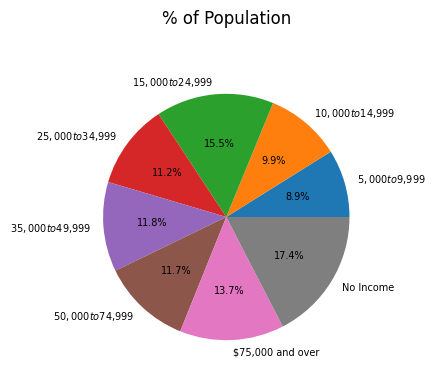

In [6]:
#pie chart of people by income level

value1 = codes_mod['$5,000 to $9,999'].sum()
value2 = codes_mod['$10,000 to $14,999'].sum()
value3 = codes_mod['$15,000 to $24,999'].sum()
value4 = codes_mod['$25,000 to $34,999'].sum()
value5 = codes_mod['$35,000 to $49,999'].sum()
value6 = codes_mod['$50,000 to $74,999'].sum()
value7 = codes_mod['$75,000 and over'].sum()
value8 = codes_mod['No Income'].sum()

pop=value1+value2+value3+value4+value5+value6+value7+value8

income_data={'Income':['$5,000 to $9,999','$10,000 to $14,999','$15,000 to $24,999','$25,000 to $34,999','$35,000 to $49,999','$50,000 to $74,999','$75,000 and over','No Income'],
           '':[value1,value2,value3,value4,value5,value6,value7,value8]}

income_df=pd.DataFrame(income_data)

fig, ax = plt.subplots(figsize=(8, 4))
income_df.plot(kind='pie',y='',labels=income_data['Income'],legend=False,autopct='%1.1f%%',ax=ax, fontsize=7)
ax.set(aspect='equal')
ax.set_title('% of Population', y=1.1)

- **Let's clean up the column names before moving to further analysis.**

In [7]:
# clean up columns names by removing unwanted special characters and spaces
edu_inc_data= codes_mod.rename(columns={
    '$10,000 to $14,999': '10000_to_14999',
    '$15,000 to $24,999': '15000_to_24999',
    '$25,000 to $34,999': '25000_to_34999',
    '$35,000 to $49,999': '35000_to_49999',
    '$5,000 to $9,999': '5000_to_9999',
    '$50,000 to $74,999': '50000_to_74999',
    '$75,000 and over': '75000_and_over'
})

---
## Factor Analysis - Year

- **Now we'll take a look at the percentage of people in each income level specifically by year.** 
    - **We can read the dataframe below as, "In the year 2008, 16.36% of respondents reported having No Income, 8.74% of respondents reported having an income between 5000 to 9999, etc."**

In [8]:
#percentage of people in each income level by year
edu_dropped = edu_inc_data.drop(['Educational Attainment', 'Age', 'Gender', 'Attainment Value'], axis=1) # Drop unnecessary columns
edu_grouped = edu_dropped.groupby('Year').sum()
edu_grouped = edu_grouped.reindex(columns = ['No Income', '5000_to_9999', '10000_to_14999', 
                                             '15000_to_24999', '25000_to_34999', '35000_to_49999', 
                                             '50000_to_74999', '75000_and_over']) # Reorder columns and rows

year_percentages = edu_grouped.div(edu_grouped.sum(axis=1), axis=0) * 100 # Formula for percentage
year_percentages

Personal Income,No Income,5000_to_9999,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_and_over
Year,,,,,,,,
2008,16.359615,8.736063,10.000637,15.219878,11.331093,12.520510,12.642143,13.190061
2009,15.772559,9.127193,9.705467,15.632018,11.346246,12.081686,12.648066,13.686764
2010,16.844292,9.121815,10.004851,15.569678,11.335292,11.815453,11.991890,13.316729
2011,18.309650,8.786706,10.477466,15.419762,10.988967,11.449690,11.710286,12.857473
2012,18.422381,9.391025,9.777245,15.744814,10.810011,11.472764,10.980656,13.401103
2013,17.679966,8.553041,10.055682,15.586502,11.000504,11.417674,11.101338,14.605293
2014,18.402997,8.531959,9.350408,15.100624,11.275587,11.619710,11.127823,14.590892


- **We'll melt the dataframe for easier plotting purposes.**

In [9]:
year_percentages = year_percentages.reset_index()

# Melt the income range columns into a single column for easier plotting
year_percentages_melted = year_percentages.melt(id_vars=['Year'], var_name='Income Range', value_name='Percentage')
year_percentages_melted.head()

,Year,Income Range,Percentage
0,2008,No Income,16.359615
1,2009,No Income,15.772559
2,2010,No Income,16.844292
3,2011,No Income,18.309650
4,2012,No Income,18.422381


- **Below is a line chart depicting the same information from the dataframe above.** 
    - **As we can see, the distribution of wealth hasn't changed significantly over time.**

In [10]:
line_chart = alt.Chart(year_percentages_melted).mark_line(point = True).encode(
    x= alt.X('Income Range', sort=['No Income', '5000_to_9999', '10000_to_14999', '15000_to_24999', 
                                   '25000_to_34999', '35000_to_49999', '50000_to_74999', '75000_and_over']),
    y='Percentage',
    color=alt.Color('Year:N')
).properties(
    title='Percentage of People in Each Income Range by Year',
    width=600,
    height=400
)

line_chart

alt.Chart(...)

---
# Factor Analysis - Age

- **Now we'll take a look at the percentage of people in each income level specifically by age.** 
    - **We can read the dataframe below as, "Of people in the age group of 00 to 17, 93.00% of respondents reported having No Income, 4.17% of respondents reported having an income between 5000 to 9999, etc.**

In [11]:
edu_dropped = edu_inc_data.drop(['Year', 'Educational Attainment', 'Gender', 'Attainment Value'], axis=1) # Drop unnecessary columns
edu_grouped = edu_dropped.groupby('Age').sum()
edu_grouped = edu_grouped.reindex(columns = ['No Income', '5000_to_9999', '10000_to_14999', 
                                            '15000_to_24999', '25000_to_34999', '35000_to_49999', 
                                            '50000_to_74999', '75000_and_over']) # Reorder columns and rows

age_percentages = edu_grouped.div(edu_grouped.sum(axis=1), axis=0) * 100 # Formula for percentage
age_percentages

Personal Income,No Income,5000_to_9999,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_and_over
Age,,,,,,,,
00 to 17,92.997858,4.165712,1.477571,0.944459,0.176611,0.125005,0.068209,0.044577
18 to 64,14.773348,8.105809,8.881801,15.388833,11.825402,12.888374,12.944181,15.192253
65 to 80+,5.671880,14.629761,18.186910,20.816751,11.336694,9.773974,9.277902,10.306129


- **We'll melt the dataframe for easier plotting purposes.**

In [12]:
age_percentages = age_percentages.reset_index()
# Melt the income range columns into a single column for easier plotting
age_percentages_melted = age_percentages.melt(id_vars=['Age'], var_name='Income Range', value_name='Percentage')
age_percentages_melted.head()

,Age,Income Range,Percentage
0,00 to 17,No Income,92.997858
1,18 to 64,No Income,14.773348
2,65 to 80+,No Income,5.671880
3,00 to 17,5000_to_9999,4.165712
4,18 to 64,5000_to_9999,8.105809


- **Below is a line chart depicting the same information from the dataframe above.** 
    - **As we can see, the 18 to 64 age group has the highest percentage of respondents in higher income ranges.**

In [13]:
line_chart = alt.Chart(age_percentages_melted).mark_line(point = True).encode(
    x= alt.X('Income Range', sort=['No Income', '5000_to_9999', '10000_to_14999', '15000_to_24999', 
                                   '25000_to_34999', '35000_to_49999', '50000_to_74999', '75000_and_over']),
    y='Percentage',
    color=alt.Color('Age', scale=alt.Scale(domain=['00 to 17', '18 to 64', '65 to 80+']))
).properties(
    title='Percentage of People in Each Income Range by Age',
    width=600,
    height=400
)

line_chart

alt.Chart(...)

---
# Factor Analysis - Gender

- **Now we'll take a look at the percentage of people in each income level specifically by gender.** 
    - **We can read the dataframe below as, "Of all males, 13.67% of respondents reported having No Income, 6.61% of respondents reported having an income between 5000 to 9999, etc."**

In [14]:
edu_dropped = edu_inc_data.drop(['Year', 'Educational Attainment', 'Age', 'Attainment Value'], axis=1) # Drop unnecessary columns
edu_grouped = edu_dropped.groupby('Gender').sum()
edu_grouped = edu_grouped.reindex(index= ['Male',"Female"],columns = ['No Income', '5000_to_9999', '10000_to_14999', 
                                            '15000_to_24999', '25000_to_34999', '35000_to_49999', 
                                            '50000_to_74999', '75000_and_over']) # Reorder columns and rows

gender_percentages = edu_grouped.div(edu_grouped.sum(axis=1), axis=0) * 100 # Formula for percentage

gender_percentages
gender_percentages.to_csv('data/gender_percentages.csv') # save this dataframe in case we need it later
gender_percentages

Personal Income,No Income,5000_to_9999,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_and_over
Gender,,,,,,,,
Male,13.667276,6.612039,8.417479,15.111933,11.686010,12.769171,13.323467,18.412625
Female,21.236500,11.205693,11.423178,15.827308,10.610054,10.736361,10.105162,8.855745


- **We'll melt the dataframe for easier plotting purposes.**

In [15]:
gender_percentages2 = gender_percentages.reset_index()

# Melt the income range columns into a single column for easier plotting
gender_percentages_melted = gender_percentages2.melt(id_vars=['Gender'], var_name='Income Range', value_name='Percentage')
gender_percentages_melted

,Gender,Income Range,Percentage
0,Male,No Income,13.667276
1,Female,No Income,21.236500
2,Male,5000_to_9999,6.612039
3,Female,5000_to_9999,11.205693
4,Male,10000_to_14999,8.417479
5,Female,10000_to_14999,11.423178
6,Male,15000_to_24999,15.111933
7,Female,15000_to_24999,15.827308
8,Male,25000_to_34999,11.686010
9,Female,25000_to_34999,10.610054


- **Below is a line chart depicting the same information from the dataframe above.** 
    - **As we can see, there is a higher percentage of male respondents falling in higher income ranges than females, and vice versa.**

In [16]:
line_chart = alt.Chart(gender_percentages_melted).mark_line(point = True).encode(
    x= alt.X('Income Range', sort=['No Income', '5000_to_9999', '10000_to_14999', '15000_to_24999', 
                                   '25000_to_34999', '35000_to_49999', '50000_to_74999', '75000_and_over']),
    y='Percentage',
    color=alt.Color('Gender', scale=alt.Scale(domain=['Male', 'Female']))
).properties(
    title='Percentage of People in Each Income Range by Gender',
    width=600,
    height=400
)

line_chart

alt.Chart(...)

- **Here is a bar graph to visually reinforce our insight from above:**

In [17]:
bar_chart = alt.Chart(gender_percentages_melted).mark_bar().encode(
    x= alt.X('Income Range', sort=['No Income', '5000_to_9999', '10000_to_14999', '15000_to_24999', 
                                   '25000_to_34999', '35000_to_49999', '50000_to_74999', '75000_and_over']),
    y='Percentage',
    color=alt.Color('Gender', scale=alt.Scale(domain=['Male', 'Female']))
).properties(
    title='Percentage of People in Each Income Range by Gender',
    width=600,
    height=400
).facet(column= 'Gender')

bar_chart

alt.FacetChart(...)

---
# Factor Analysis - Educational Attainment

- **Now we'll take a look at the percentage of people in each income level specifically by educational attainment level.** 
    - **We can read the dataframe below as, "Of the respondents with No high school diploma, 41.70% reported having No Income, 12.56% of reported having an income between 5000 to 9999, etc."**

In [18]:
edu_dropped = edu_inc_data.drop(['Year', 'Age', 'Gender', 'Attainment Value'], axis=1) # Drop unnecessary columns
edu_grouped = edu_dropped.groupby('Educational Attainment').sum()
edu_grouped = edu_grouped.reindex(index = ['Children under 15', 'No high school diploma', 'High school or equivalent', 'Some college, less than 4-yr degree', "Bachelor's degree or higher"], columns = ['No Income', '5000_to_9999', '10000_to_14999', 
                                             '15000_to_24999', '25000_to_34999', '35000_to_49999', 
                                             '50000_to_74999', '75000_and_over']) # Reorder columns and rows

edu_percentages = edu_grouped.div(edu_grouped.sum(axis=1), axis=0) * 100 # Formula for percentage

# Remove 'Children under 15' row since all values are NaN
edu_percentages.drop('Children under 15', axis = 0, inplace = True)
edu_percentages
edu_percentages.to_csv('data/edu_percentages.csv') # save this dataframe in case we need it later
edu_percentages

Personal Income,No Income,5000_to_9999,10000_to_14999,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_and_over
Educational Attainment,,,,,,,,
No high school diploma,41.701091,12.555534,13.565385,16.664714,7.513727,4.769171,2.287044,0.943333
High school or equivalent,16.588099,10.332479,11.874964,19.977274,14.225719,13.062231,9.199420,4.739814
"Some college, less than 4-yr degree",11.353424,9.832446,10.666299,17.128063,13.656884,14.408159,12.754349,10.200375
Bachelor's degree or higher,5.783855,4.124284,4.912582,9.441850,9.055422,13.418665,19.766315,33.497028


- **We'll melt the dataframe for easier plotting purposes.**

In [19]:
# Reset the index to make Educational Attainment a column
edu_percentages2 = edu_percentages.reset_index()

# Melt the income range columns into a single column for easier plotting
edu_percentages_melted = edu_percentages2.melt(id_vars=['Educational Attainment'], var_name='Income Range', value_name='Percentage')
edu_percentages_melted.head()

,Educational Attainment,Income Range,Percentage
0,No high school diploma,No Income,41.701091
1,High school or equivalent,No Income,16.588099
2,"Some college, less than 4-yr degree",No Income,11.353424
3,Bachelor's degree or higher,No Income,5.783855
4,No high school diploma,5000_to_9999,12.555534


- **Below is a line chart depicting the same information from the dataframe above.** 
    - **As we can see, those with higher educational attainment levels have greater percentages of respondents in higher income ranges, and vice versa.**

In [20]:
line_chart = alt.Chart(edu_percentages_melted).mark_line(point = True).encode(
    x= alt.X('Income Range', sort=['No Income', '5000_to_9999', '10000_to_14999', '15000_to_24999', 
                                   '25000_to_34999', '35000_to_49999', '50000_to_74999', '75000_and_over']),
    y='Percentage',
    color=alt.Color('Educational Attainment', scale=alt.Scale(domain=['Children under 15', 'No high school diploma', 
                                                                      'High school or equivalent', 'Some college, less than 4-yr degree', 
                                                                      "Bachelor's degree or higher"]))
).properties(
    title='Percentage of People in Each Income Range by Educational Attainment',
    width=600,
    height=400
)

line_chart

alt.Chart(...)

- **Here is a bar graph to visually reinforce our insight from above:**

In [21]:
bar_chart = alt.Chart(edu_percentages_melted).mark_bar().encode(
    x= alt.X('Educational Attainment', sort = ['Children under 15', 'No high school diploma', 'High school or equivalent', 
                                               'Some college, less than 4-yr degree', "Bachelor's degree or higher"]),
    y='Percentage',
    color= alt.Color('Income Range', scale=alt.Scale(domain=['No Income', '5000_to_9999', '10000_to_14999', '15000_to_24999', 
                                   '25000_to_34999', '35000_to_49999', '50000_to_74999', '75000_and_over']))
).properties(
    title='Educational Attainment vs. Income Ranges',
    width=600,
    height=400
)

bar_chart

alt.Chart(...)

---
## Factor Analysis - Gender and Educational Attainment (Interaction)

- **Let's continue our analysis with a specific focus on gender and educational attainment level.**
- **We'll need to create a dataframe that combines both our gender and educational attainment percentages dataframes from earlier. This will be useful for deeper analysis going forward.**

In [22]:
edu_percentages = pd.read_csv('data/edu_percentages.csv') # load our dataframes back in from earlier
gender_percentages = pd.read_csv('data/gender_percentages.csv')

# Transpose the edu_percentages dataframe and reset index
edu_percentages_transposed = edu_percentages.set_index('Educational Attainment').T.reset_index()
edu_percentages_transposed = edu_percentages_transposed.rename(columns={'index': 'Personal Income'})

# Transpose the gender_percentages dataframe and reset index
gender_percentages_transposed = gender_percentages.set_index('Gender').T.reset_index()
gender_percentages_transposed = gender_percentages_transposed.rename(columns={'index': 'Personal Income'})

# Merge the transposed dataframes on 'Personal Income'
perc_dat = pd.merge(edu_percentages_transposed, gender_percentages_transposed, on='Personal Income')
perc_dat # we will use this dataframe from here on out

,Personal Income,No high school diploma,High school or equivalent,"Some college, less than 4-yr degree",Bachelor's degree or higher,Male,Female
0,No Income,41.701091,16.588099,11.353424,5.783855,13.667276,21.236500
1,5000_to_9999,12.555534,10.332479,9.832446,4.124284,6.612039,11.205693
2,10000_to_14999,13.565385,11.874964,10.666299,4.912582,8.417479,11.423178
3,15000_to_24999,16.664714,19.977274,17.128063,9.441850,15.111933,15.827308
4,25000_to_34999,7.513727,14.225719,13.656884,9.055422,11.686010,10.610054
5,35000_to_49999,4.769171,13.062231,14.408159,13.418665,12.769171,10.736361
6,50000_to_74999,2.287044,9.199420,12.754349,19.766315,13.323467,10.105162
7,75000_and_over,0.943333,4.739814,10.200375,33.497028,18.412625,8.855745


- **As we found earlier, there is a greater percentage of male respondents falling into high income ranges in comparison to females. We also found that there is a greater percentage of highly educated individuals falling into high income ranges in comparison to those with lower levels of education.**
- **Naturally, it would make sense to examine the correlation between these two variables. Let's do this with a correlation matrix.**
    - **As we can see, males are strongly positively correlated with higher levels of education, while females are positively correlated with lower levels of edcuation.**

In [23]:
#created correlation matrix
x_mx = perc_dat.drop(columns = ['Personal Income'])
corr_mx = x_mx.corr()

#correlation heat map
corr_mx_long = corr_mx.reset_index().rename(
    columns = {'index': 'row'}
).melt(
    id_vars = 'row',
    var_name = 'col',
    value_name = 'Correlation'
)

# construct plot
alt.Chart(corr_mx_long).mark_rect().encode(
    x = alt.X('col', title = '', sort = {'field': 'Correlation', 'order': 'ascending'}), 
    y = alt.Y('row', title = '', sort = {'field': 'Correlation', 'order': 'ascending'}),
    color = alt.Color('Correlation', 
                      scale = alt.Scale(scheme = 'blueorange', # diverging gradient
                                        domain = (-1, 1), # ensure white = 0
                                        type = 'sqrt'), # adjust gradient scale
                     legend = alt.Legend(tickCount = 5)) # add ticks to colorbar at 0.5 for reference
).properties(width = 300, height = 300)

alt.Chart(...)

- **From this correlation matrix, we may initially assume that females tend to fall into lower income ranges simply because they have a weaker correlation with high levels of education. However, what if there are other factors at play as well?**
    - **We can answer this question by leveling the playing field and stratifying the data by educational attainment levels. This way, we can analyze the income disparities between genders who have attained the same level of education. This approach helps us explore whether females, who have pursued higher education to the same degree as their male counterparts, still experience income disparities. It allows us to investigate if gender-based income differences persist even when educational attainment is held constant.** 
    
    
- **As we can see directly below, females still tend to fall in lower income ranges even when they have pursued the same level of education as males. This indicates the possibility that even if females were just as correlated with higher levels of education as males, they would still be falling into lower income ranges. This suggests the impact of additional factors such as occupational segregation, negotiation skills, work experience, hours worked, etc. on the gender pay gap.**

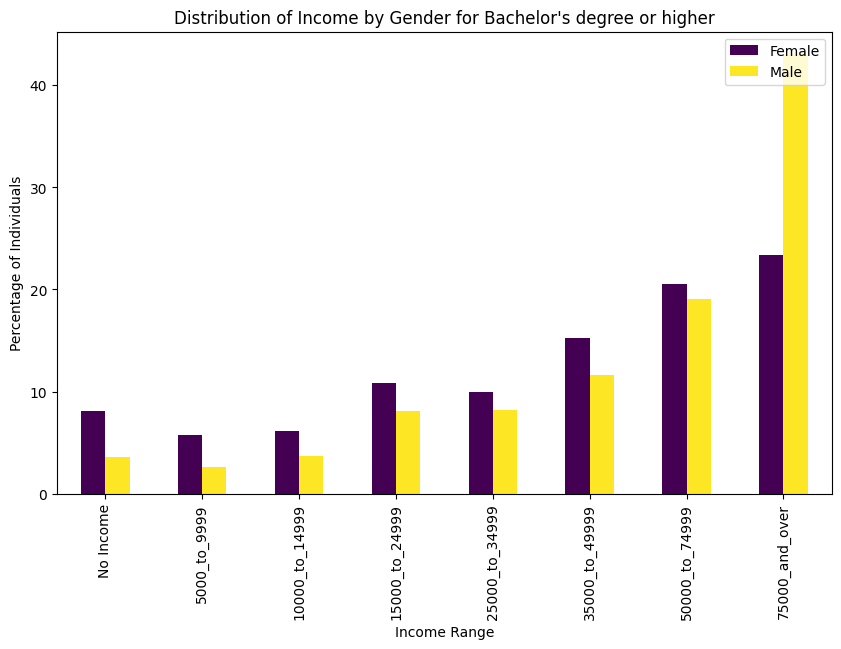

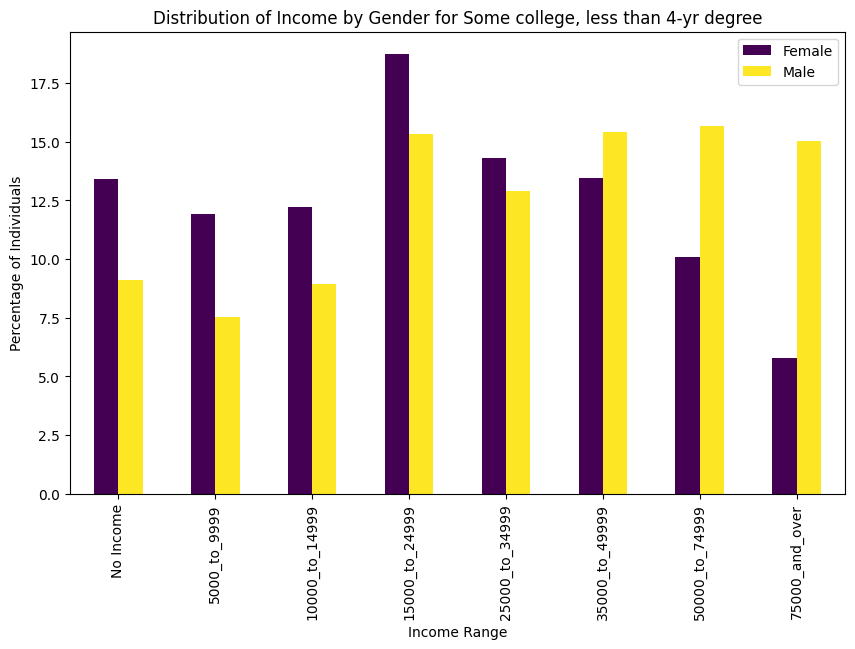

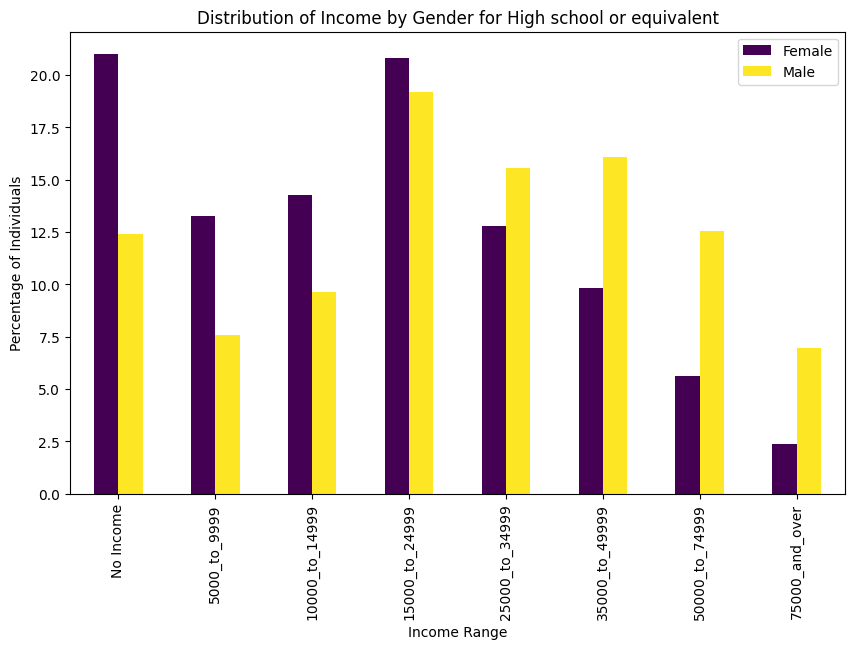

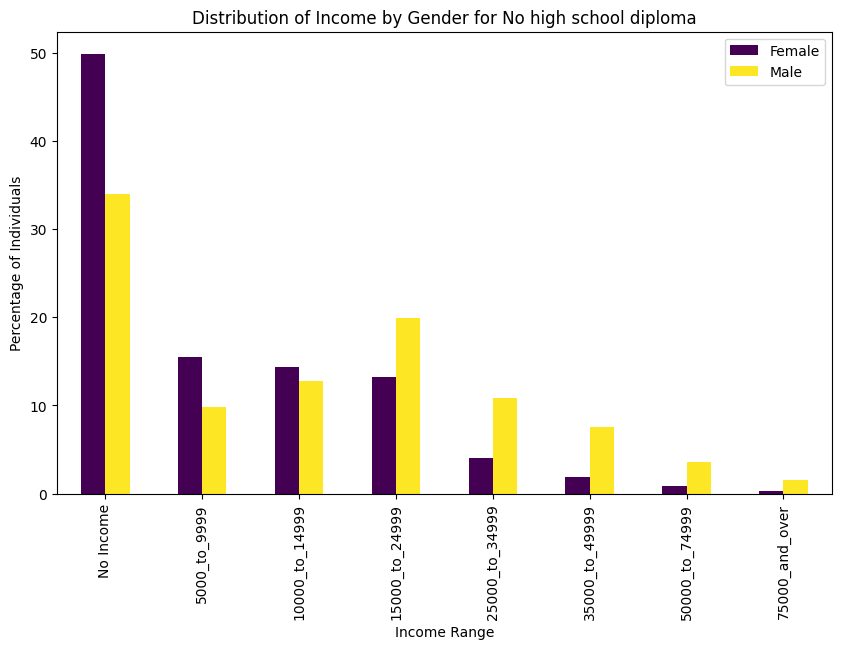

In [24]:
income_order = ['No Income', '5000_to_9999', '10000_to_14999', '15000_to_24999', '25000_to_34999', 
                '35000_to_49999', '50000_to_74999', '75000_and_over'] # order for the income range categories on the x-axis
edu_level_order = ["Bachelor's degree or higher", "Some college, less than 4-yr degree", 
                   "High school or equivalent", "No high school diploma"] # order for displaying the charts for each educational attainment level

def calculate_income_percentage_by_gender(data): # function to calculate the percentage of individuals in each income range for each gender within each educational level
    data_dropped = data.drop(['Year', 'Age', 'Educational Attainment', 'Attainment Value'], axis=1) 
    data_grouped = data_dropped.groupby('Gender').sum() # Group by Gender and calculate the sum
    percentages = data_grouped.div(data_grouped.sum(axis=1), axis=0) * 100 # Calculate percentages
    percentages = percentages.reset_index() 
    percentages_melted = percentages.melt(id_vars=['Gender'], var_name='Income Range', value_name='Percentage') # Melt the income range columns
    return percentages_melted

all_percentages_list = [] # Initialize a list to store the calculated percentages DataFrames
for edu_level in edu_inc_data[edu_inc_data['Educational Attainment'] != 'Children under 15']['Educational Attainment'].unique(): # Iterate over each unique educational attainment level in the dataset, excluding "Children under 15"
    edu_level_data = edu_inc_data[edu_inc_data['Educational Attainment'] == edu_level] # Filter the dataset for the current educational attainment level
    edu_level_percentages = calculate_income_percentage_by_gender(edu_level_data) # Calculate the percentage of individuals in each income range for each gender within the current educational attainment level
    edu_level_percentages['Educational Attainment'] = edu_level # Add the educational attainment level as a new column
    all_percentages_list.append(edu_level_percentages) # Append the calculated percentages DataFrame for the current educational attainment level to the list
all_percentages = pd.concat(all_percentages_list, ignore_index=True) # Concatenate the list of DataFrames to create the overall DataFrame

def plot_income_by_gender(data, edu_level): # function to create a bar chart for each educational attainment level
    data_filtered = data[data['Educational Attainment'] == edu_level] # Filter the data for the current educational attainment level
    data_pivot = data_filtered.pivot(index='Income Range', columns='Gender', values='Percentage') # Pivot the data for easier plotting
    data_pivot = data_pivot.reindex(income_order) # Reorder the index based on the specified income order
    ax = data_pivot.plot(kind='bar', figsize=(10, 6), colormap='viridis')
    plt.title(f'Distribution of Income by Gender for {edu_level}') # Create a bar chart
    plt.xlabel('Income Range')
    plt.ylabel('Percentage of Individuals')
    plt.legend(loc='upper right')

# Plot the bar charts for each educational attainment level
for edu_level in edu_level_order:
    plot_income_by_gender(all_percentages, edu_level)

---
# Principal Component Analysis - Gender and Educational Attainment

- **Let's now begin  our Principal Component Analysis.  In PCA, principal components are new variables that are linear combinations of the original variables. (PCA) consists in finding variable combinations that capture large portions of the variation and covariation in one's dataset.**
- **First we'll configure the module with a fixed number of components to match the number of variables in the dataset and store the result under a separate name.**

In [25]:
# Data are typically normalized because without normalization
# the variables on the largest scales tend to dominate the principal components
x_ctr = (x_mx - x_mx.mean())/x_mx.std()

# compute principal components
pca = PCA(n_components = x_ctr.shape[1])
pca.fit(x_ctr)

pca.explained_variance_ratio_

array([5.31479859e-01, 2.78187125e-01, 1.86821617e-01, 3.26840171e-03,
       2.42997172e-04, 2.49877389e-33])

- **The basic strategy for selecting a number of principal components to work with is to determine how many are needed to capture a large portion of variation and covariation in the original data. Let's find out which ones explain the largest proportions of variance.**

In [26]:
# store proportion of variance explained as a dataframe
pca_var_explained = pd.DataFrame({'Proportion of variance explained': pca.explained_variance_ratio_})

# add component number as a new column
pca_var_explained['Component'] = np.arange(1, 7)

# print
pca_var_explained

,Proportion of variance explained,Component
0,5.314799e-01,1
1,2.781871e-01,2
2,1.868216e-01,3
3,3.268402e-03,4
4,2.429972e-04,5
5,2.498774e-33,6


In [27]:
# add cumulative variance explained as a new column
pca_var_explained['Cumulative variance explained'] = pca_var_explained['Proportion of variance explained'].cumsum()
pca_var_explained

,Proportion of variance explained,Component,Cumulative variance explained
0,5.314799e-01,1,0.531480
1,2.781871e-01,2,0.809667
2,1.868216e-01,3,0.996489
3,3.268402e-03,4,0.999757
4,2.429972e-04,5,1.000000
5,2.498774e-33,6,1.000000


- **Below is a dual-axis plot showing the proportion of variance explained by a given component, along with the cumulative variance explained.**

In [28]:
# encode component axis only as base layer
base = alt.Chart(pca_var_explained).encode(
    x = 'Component')

# make a base layer for the proportion of variance explained
prop_var_base = base.encode(
    y = alt.Y('Proportion of variance explained',
              axis = alt.Axis(titleColor = '#57A44C'))
)

# make a base layer for the cumulative variance explained
cum_var_base = base.encode(
    y = alt.Y('Cumulative variance explained', axis = alt.Axis(titleColor = '#5276A7'))
)

# add points and lines to each base layer
prop_var = prop_var_base.mark_line(stroke = '#57A44C') + prop_var_base.mark_point(color = '#57A44C')
cum_var = cum_var_base.mark_line() + cum_var_base.mark_point()

# layer the layers
var_explained_plot = alt.layer(prop_var, cum_var).resolve_scale(y = 'independent')

# display
var_explained_plot

alt.LayerChart(...)

- **It is evident that the first two components are most significant, as they collectively capture about 81% of variation. Let's move forward with these two.**
- **Now that we've chosen the number of components to work with, the next step is to examine loadings to understand just which variables the components combine with significant weight.**

In [29]:
# store the loadings as a data frame with appropriate names 
loading_df = pd.DataFrame(pca.components_[0:2]).transpose().rename(
    columns = {0: 'PC1', 1:'PC2'} # add entries for each selected component
).loc[:, ['PC1', 'PC2']] # slice just components of interest# add a column with the taxon names

# add a column with the variable names
loading_df['Variable'] = list(corr_mx.index)
loading_df

,PC1,PC2,Variable
0,-0.480384,0.039148,No high school diploma
1,-0.505730,-0.236991,High school or equivalent
2,-0.190714,-0.551335,"Some college, less than 4-yr degree"
3,0.459163,-0.378533,Bachelor's degree or higher
4,0.158178,-0.686291,Male
5,-0.491167,-0.155078,Female


- **Let’s create a loading plot below and interpret the loadings:**
- **PC1:**
    - **"No high school diploma", "High school or equivalent", and "Female" have negative loadings, suggesting they are negatively associated with PC1.**
    - **"Bachelor's degree or higher" and "Male" have positive loadings, indicating they are positively associated with PC1.**
    - **PC1 seems to contrast higher education level and being male with lower education level and being female.**
- **PC2:**
    - **"Some college, less than 4-yr degree" and "Male" have the most negative loadings on PC2, indicating they are strongly negatively associated with this component.**
    - **"No high school diploma" has a slightly positive loading on PC2, but the other variables are negatively associated with PC2.**
    - **PC2 seems to primarily contrast "Some college, less than 4-yr degree" and "Male" with the other variables.**

In [30]:
#loading plot 
# melt from wide to long
loading_plot_df = loading_df.melt(
    id_vars = 'Variable',
    var_name = 'Principal Component',
    value_name = 'Loading'
)

# create base layer with encoding
loading_plot_df['zero'] = np.repeat(0, len(loading_plot_df))
base = alt.Chart(loading_plot_df)
loadings= base.mark_line(point = True).encode(
    y = 'Loading',
    x = alt.X('Variable', title = ''),
    color = 'Principal Component'
)
# store horizontal line at zero
rule = base.mark_rule().encode(y = alt.Y('zero', title = 'Loading'), size = alt.value(0.05))

# layer points + lines + rule to construct loading plot
loading_plot = (loadings + rule).properties(width = 120)

# show
loading_plot

alt.LayerChart(...)

- **Now let's examine the scores of the original observations (income brackets) on the first two principal components (PC1 and PC2) obtained from PCA. These scores are essentially the projections of our original data points onto the new axes defined by the principal components.**

In [31]:
# project data onto first two components; store as data frame
projected_data = pd.DataFrame(pca.fit_transform(x_ctr)).iloc[:, 0:2].rename(columns = {0: 'PC1', 1:'PC2'})

# add state and county
projected_data[['Personal Income']] = perc_dat[['Personal Income']]

projected_data

,PC1,PC2,Personal Income
0,-2.745525,-0.159864,No Income
1,-0.046102,2.160795,5000_to_9999
2,-0.226946,1.527933,10000_to_14999
3,-1.749813,-1.885087,15000_to_24999
4,-0.058404,-0.003994,25000_to_34999
5,0.344383,-0.491332,35000_to_49999
6,1.374956,-0.257808,50000_to_74999
7,3.107452,-0.890645,75000_and_over


- **Let's create a scatterplot of the information above and interpret the results:**
- **PC1:**
    - **The "No Income" bracket has a highly negative score on PC1, indicating that it is strongly associated with lower educational attainment and being female (as interpreted from the loadings of PC1).**
    - **The "75000_and_over" bracket has a highly positive score on PC1, suggesting that it is strongly associated with higher educational attainment and being male.**
    - **The other income brackets have scores between these extremes on PC1, indicating varying levels of association with educational attainment and gender.**
- **PC2:**
    - **The "5000_to_9999" and "10000_to_14999" brackets have positive scores on PC2, indicating a unique pattern for these income brackets, possibly a stronger association with having "Some college, less than 4-yr degree" and being male.**
    - **The "15000_to_24999" bracket has a notably negative score on PC2, suggesting a different pattern, possibly less association with having "Some college, less than 4-yr degree" and being male.**


In [32]:
base = alt.Chart(projected_data)

# data scatter
scatter = base.mark_point().encode(
    x = alt.X('PC1:Q', title = 'Principal Component 1'),
    y = alt.Y('PC2:Q', title = 'Prinicipal Component 2'),
    color = 'Personal Income'
)

# show
scatter

alt.Chart(...)

- **Visualizing the scores of the income brackets on the first two principal components further illustrated the relationships and variances among different income levels based on education and gender. The patterns observed in the PCA suggest that educational attainment and gender significantly impact the distribution of income in California, with higher incomes more prevalent among individuals with higher education and males, and lower incomes more associated with lower educational attainment and females.**

---
## Conclusion
My research aimed to explore the relationship between educational attainment, gender, and income brackets, and how these relationships evolve over time and across age groups. Through my visualizations, I was able to find that higher educational attainment levels were positively correlated with higher income ranges. A reasonable speculation for the this finding is that high-paying employers tend to seek out employees who are able to demonstrate proficiency in their field, and higher educational attainment levels (i.e. Bachelor degrees) serve as indicators of this proficiency. I also found that males generally tend to fall in higher income ranges than their female counterparts. After creating a correlation matrix, I then found that males were more positively correlated with high levels of education than females. This correlation led me to initially assume that females fall into lower income ranges simply because they have a weaker correlation with high levels of education. However, deeper analysis revealed that women consistently fall into lower income brackets even with equivalent education levels, highlighting the influence of additional factors like occupational segregation and negotiation skills on the gender pay gap.

Over the years, the distribution of individuals across income ranges has remained relatively stable, reflecting the persistent nature of income inequality. The age group analysis indicated a higher concentration of individuals aged 18 to 64 in higher income brackets, possibly due to the increasing prevalence of higher education across generations.

The Principal Component Analysis (PCA) identified two principal components accounting for 81% of the total variance. The first component contrasted higher education and being male against lower education and being female, indicating a variance in income distribution, with higher incomes associated with higher education and males. The second component revealed a distinct income distribution pattern for individuals with “some college, less than 4-yr degree” and males.

These findings underscore the significant impact of educational attainment and gender on income distribution in California. They highlight the persistence of gender-based income disparities, even when accounting for educational attainment, and the need for further research into the additional factors contributing to these disparities. The consistent income distribution over time and the unique patterns revealed by the PCA suggest potential areas for further investigation and intervention to address income inequality.